Different from dataset1.ipynb where the target audio is reconstructed from a test spectrogram dataset, similar to the training spectrogram dataset.

In dataset1_1.ipynb, the target audio is the original audio, extracted in reconstruction_minimal2.py.


However, predicted audio from the test spectrogram has a slightly different length from the original test audio.

Manually delineate the boundary.

Use sid 6 which has the best CC.

In [1]:
from dSPEECH.config import *
import numpy as np
import matplotlib.pyplot as plt
import librosa

pre_all: Running from CMD.


In [2]:
folder=data_dir+'evaluation_matrix/dataset1/reconstructed/mel_23/sid6/'
file_target='waveform_truth.wav'
file_pred='waveform_pred.wav'

In [3]:
target,sf=librosa.load(folder+file_target)
pred,sf=librosa.load(folder+file_pred)

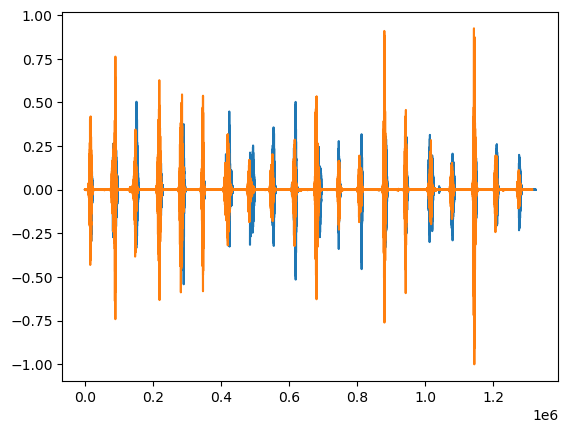

In [4]:
%matplotlib inline # blue line is a bit longer
plt.plot(target)
plt.plot(pred)

In [5]:
starts_target=[0.637,3.517,6.219,9.708,12.641,15.568,18.597,21.724,24.717,27.469,30.659,33.608,36.394,39.784,42.604,45.693,48.706,51.738,54.631,57.650]
boundaries_pred=[[0.379,1.210],[3.353,4.411],[5.832,7.172],[9.249,10.581],[12.408,13.425],[15.285,16.246],[18.320,19.785],[21.430,22.803],[24.418,25.661],[27.359,29.064],[30.435,31.562],[33.390,34.5],[36.164,37.142],[39.379,40.564],[42.389,43.253],[45.38,46.83],[48.434,49.509,51.339,52.577],[54.307,55.271],[57.378,58.342]]

In [6]:
boundaries_target=[[s,s+(b[1]-b[0])] for s,b in zip(starts_target,boundaries_pred)]

In [18]:
import soundfile

for i in range(len(boundaries_target)):
    len_t=int(boundaries_target[i][1]*sf-boundaries_target[i][0]*sf)
    len_p=int(boundaries_pred[i][1]*sf-boundaries_pred[i][0]*sf)
    len_common=min(len_t,len_p)
    
    tmp1=target[int(boundaries_target[i][0]*sf):int(boundaries_target[i][0]*sf)+len_common]
    soundfile.write(folder+'target_trial_'+str(i)+'.wav', tmp1, sf)
    
    tmp2=pred[int(boundaries_pred[i][0]*sf):int(boundaries_pred[i][0]*sf)+len_common]
    soundfile.write(folder+'pred_trial_'+str(i)+'.wav', tmp2, sf)
    